# Audio Processing for Noise Removal
This notebook documents the processing steps for removing noise from an audio track.  In particular, it was being applied to a specific audio track from YouTube lectures by Paul Dirac.  These lectures had audio with substantial background "hum" which I wished to remove and produce a cleaned-up audio track.  (This first lecture is:  https://www.youtube.com/watch?v=vwYs8tTLZ24 )

As a preprocessing step, used a site called https://peggo.tv/ to convert part of the YouTube to an MP3 extract.  Then I used an MP3 to WAV conversion tool called ffmpeg (https://www.ffmpeg.org/).

## Loading Data

In [491]:
import numpy as np
import scipy.signal as sig
import io
import soundfile as sf
import matplotlib.pyplot as plt
import pickle
import sounddevice as sd

inputFile = './wav/Dirac_1_of_4.wav'
data, samplerate = sf.read(inputFile)
print('Samplerate = ', samplerate)
data.shape

Samplerate =  44100


(5292288, 2)

## Displaying Data

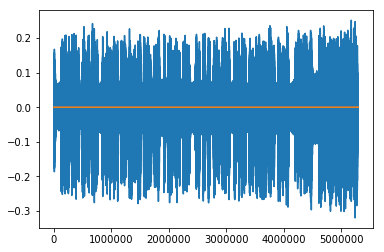

In [492]:
plt.plot(data)
plt.show()

In [493]:
len(data)/samplerate

120.0065306122449

The above snippet represents about 120 seconds (2 minutes) of data at the beginning of the lecture.  The entire lecture is about 1 hour long.

In [500]:
#sd.play(data, samplerate)
#sd.stop()

## Analyzing the Data

Zoom into the initial segment of audio.

In [495]:
num_seconds_to_extract = 4 # seconds of data
len_extract = num_seconds_to_extract*samplerate 
data_extract = data[:len_extract,0]
type(data_extract)

numpy.ndarray

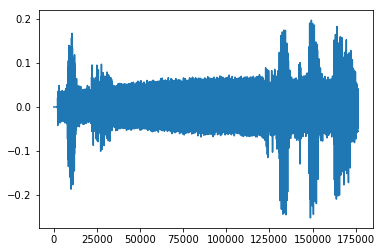

In [496]:
plt.plot(data_extract)
plt.show()

In [501]:
sd.play(data_extract, samplerate)
#sd.stop()

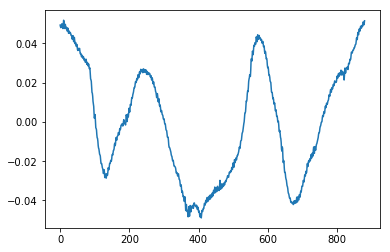

881

In [405]:
# This is about one period of the noise waveform
noise_extract_length=881
noise_extract_start=40000
# This is about one period of the noise waveform
noise_extract=data_extract[noise_extract_start:noise_extract_start+noise_extract_length]
plt.plot(noise_extract)
plt.show()
len(noise_extract)

In [406]:
###sd.play(noise_extract, samplerate)

## Correcting the Data

In [409]:
# See if we can cancel the noise from the noise portion of the timeseries itself.
# Create a repeated section of the noise waveform.

nTile=int(np.ceil(len(data_extract)/len(noise_extract))) # number of duplicates
noise_tile = np.tile(noise_extract,nTile)

### sample_start_index=40000+10*876
### sample_end_index=70000
### plot_extent=2000
### relative_shift=0
### noise_scale = 0.0
### plt.plot(data_extract[sample_start_index:sample_start_index+plot_extent],'b')
### plt.plot(noise_scale*noise_tile[sample_start_index+relative_shift:sample_start_index+plot_extent+relative_shift],'r')

# subtract noise
### signal_minus_noise=data_extract[sample_start_index:sample_end_index]-noise_scale*noise_tile[sample_start_index+relative_shift:sample_end_index+relative_shift]

# Create plot
### plt.plot(signal_minus_noise[:plot_extent],'g')
### plt.plot(noise_tile[:plot_extent],'g')
### plt.show()

In [411]:
# Do the noise cancellation here.
###relative_shift=580
###process_length=len(data_extract)-1000
###print('len(data_extract = ', len(data_extract))
###print('len(noise)tile = ', len(noise_tile))
###signal_minus_noise_final=data_extract[:process_length]-1.1*noise_tile[relative_shift:process_length+relative_shift]
###plt.plot(signal_minus_noise_final[50000:55000],'g')
###plt.show()

### Correcting the data, improved approach

test_window =  3524
40000/test_window =  11.350737797956867
num_data_segments =  50
max_corr_index =  1208
len_data_segment =  3524


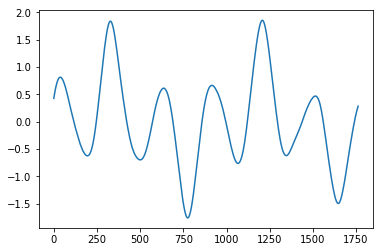

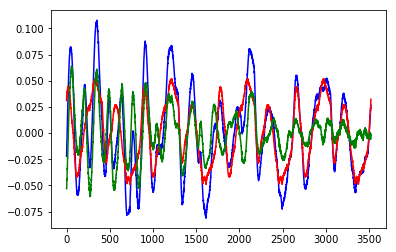

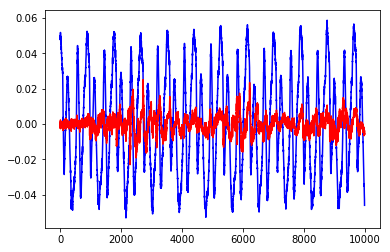

len(correced_signal_list) =  176200


numpy.ndarray

In [618]:
# Because of the slight phase shifting of the data in time, 
# break up the original data record in shorter sections
# shift the noise model for maximum correlation, and then do the substraction.
# stitch the the data extracts back together and then listen to it.

test_window=4*noise_extract_length
noise_segment_extent=2*noise_extract_length
noise_segment=noise_tile[:noise_segment_extent]

print('test_window = ', test_window)
print('40000/test_window = ', 40000/test_window)

num_data_segments = int(np.floor(len(data_extract)/test_window))
print('num_data_segments = ', num_data_segments )

corrected_signal_list = []
for iSegment in range(num_data_segments):
    data_segment=data_extract[iSegment*test_window:(iSegment+1)*test_window]
    sig_noise_corr = np.correlate(data_segment, noise_segment)
    max_corr_index = np.argmax(sig_noise_corr)
    shifted_noise = noise_tile[noise_segment_extent-max_corr_index:test_window+noise_segment_extent-max_corr_index]
    corrected_signal = data_segment-shifted_noise
    corrected_signal_list = corrected_signal_list + corrected_signal.tolist()
    
print('max_corr_index = ', max_corr_index)
print('len_data_segment = ', len(data_segment))

modified_data_extract = np.array(corrected_signal_list)

plt.plot(sig_noise_corr)
plt.show()
plt.plot(data_segment,'b')
plt.plot(shifted_noise,'r')
plt.plot(corrected_signal,'g')
plt.show()
plt.plot(data_extract[40000:50000],'b')
plt.plot(modified_data_extract[40000:50000],'r')
plt.show()
plt.show()
print('len(correced_signal_list) = ', len(corrected_signal_list))
type(corrected_signal)

In [587]:
res = np.correlate([1,2,3,4],
                   [5,10])
print(res)
print(5+20+24)
print(15+20+8)

listA = res.tolist()
listB = res.tolist()

listC = listA + listB

print(listC)

[25 40 55]
49
43
[25, 40, 55, 25, 40, 55]


In [626]:
# the original data extracts
sd.play(data_extract, samplerate)
#sd.stop()

In [627]:
# The corrected data extract
sd.play(modified_data_extract, samplerate)
#sd.stop()